In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

This dataset contains 613 records and 13 features.

Let's check for duplicates in the dataset.

In [6]:
df.duplicated().sum()

0

Duplicates are not present in the dataset.

Let's check for nulls in the dataset.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Nulls are present in the features. Let's replace those null values with appropriate data.

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [10]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [15]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [16]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [20]:
df['LoanAmount'].mean()

146.41216216216216

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Loan_Amount_Term'].value_counts()

In [22]:
df['Loan_Amount_Term'].mean()

342.0

In [23]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Credit_History'].unique()

array([1., 0.])

In [27]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Below are the observations from the above data,

For feature 'ApplicationIncome' mean is greater than 50% data. So, data is right skewed. There is huge difference between 75% data and max data, so there can be outliers present in this feature.

For feature 'Coapplicationincome' mean is greater than 50% data so, data may be right skewed. There is huge difference between 75% data and max data, so there can be outliers present in this feature.

For feature 'LoanAmount' mean is greater than 50% data so, data may be right skewed. There is huge difference between 75% data and max data, so there can be outliers present in this feature.

For feature 'Loan_Amount_Term' mean is less then 50% data. So, data is left skewed.



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
numerical_column=[]
categorical_column=[]

for i in df.columns:
    if(df[i].dtypes=='object'):
        categorical_column.append(i)
        
    else:
        numerical_column.append(i)

In [31]:
numerical_column

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Let's plot graphs and understand the data.

In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

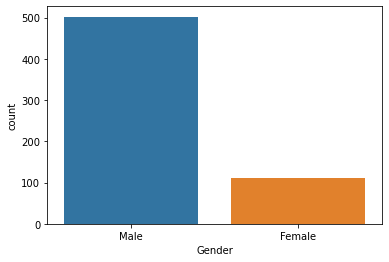

In [33]:
sns.countplot(x='Gender',data=df)
plt.show()

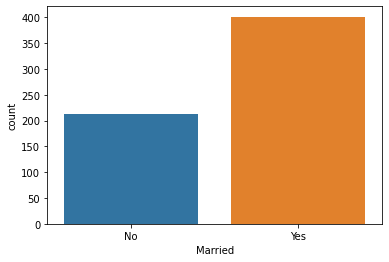

In [34]:
sns.countplot(x='Married',data=df)
plt.show()

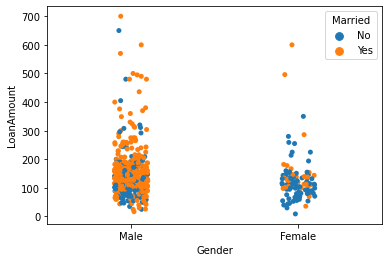

In [35]:
sns.stripplot(x='Gender',y='LoanAmount',hue='Married',data=df)
plt.show()

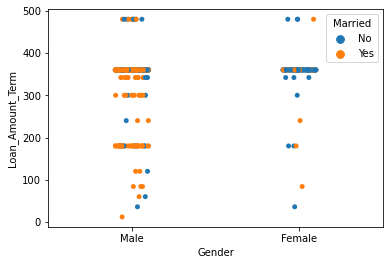

In [38]:
sns.stripplot(x='Gender',y='Loan_Amount_Term',hue='Married',data=df)
plt.show()

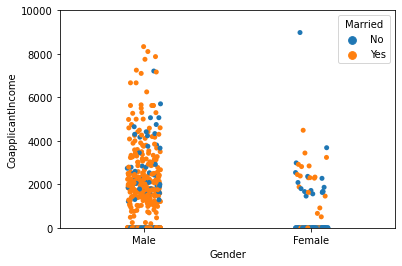

In [42]:
sns.stripplot(x='Gender',y='CoapplicantIncome',hue='Married',data=df)
plt.ylim([0,10000])
plt.show()

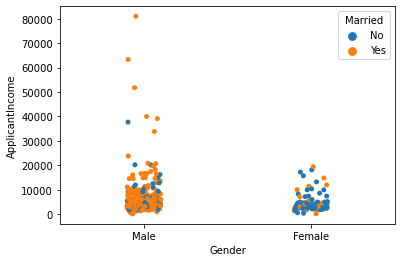

In [43]:
sns.stripplot(x='Gender',y='ApplicantIncome',hue='Married',data=df)

plt.show()

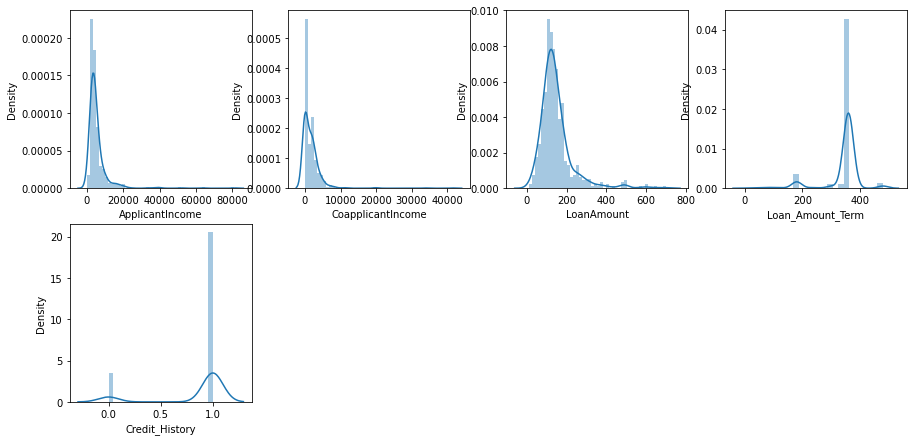

In [44]:

plt.figure(figsize=(15,19))
n=1
for i in numerical_column:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

Skewness present in th features. Let's use techniques reduce skeweness.

In [45]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [56]:
from scipy.stats import boxcox
df['ApplicantIncome']=boxcox(df['ApplicantIncome'])[0]
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term']=boxcox(df['Loan_Amount_Term'])[0]
df.skew()

ApplicantIncome     -0.092513
CoapplicantIncome    0.196726
LoanAmount           0.151313
Loan_Amount_Term     0.385840
Credit_History      -2.021971
dtype: float64

Since 'Credit_History' feature does not contain continuous data let's not reduce skeweness in this feature. 

Let's check for outliers present in the dataset.

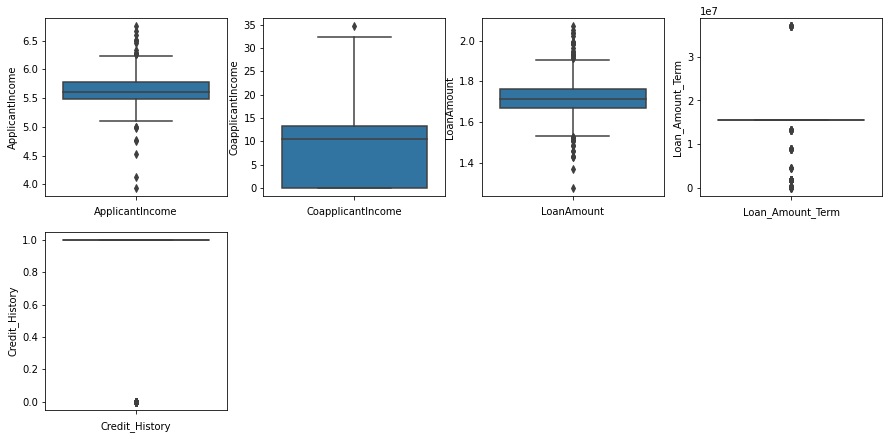

In [58]:

plt.figure(figsize=(15,19))
n=1
for i in numerical_column:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

Outliers are present in all the features, lets remove outliers.

In [59]:
from scipy.stats import zscore
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
zscore=np.abs(zscore(df[cols]))
df1=df[(zscore<3).all(axis=1)]
df1.shape

(582, 13)

Let's enode categorical columns present in the dataset with the help of encoding techniques.

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
categorical_column

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [65]:
for i in categorical_column[1:]:
    print(df1[i].value_counts())
    print('---------------')

Male      478
Female    104
Name: Gender, dtype: int64
---------------
Yes    383
No     199
Name: Married, dtype: int64
---------------
0     340
1      99
2      97
3+     46
Name: Dependents, dtype: int64
---------------
Graduate        454
Not Graduate    128
Name: Education, dtype: int64
---------------
No     505
Yes     77
Name: Self_Employed, dtype: int64
---------------
Semiurban    219
Urban        190
Rural        173
Name: Property_Area, dtype: int64
---------------
Y    405
N    177
Name: Loan_Status, dtype: int64
---------------


In [66]:
LE=LabelEncoder()
for i in categorical_column[1:]:
    df1[i]=LE.fit_transform(df1[i])

In [67]:
for i in categorical_column[1:]:
    print(df1[i].value_counts())
    print('---------------')

1    478
0    104
Name: Gender, dtype: int64
---------------
1    383
0    199
Name: Married, dtype: int64
---------------
0    340
1     99
2     97
3     46
Name: Dependents, dtype: int64
---------------
0    454
1    128
Name: Education, dtype: int64
---------------
0    505
1     77
Name: Self_Employed, dtype: int64
---------------
1    219
2    190
0    173
Name: Property_Area, dtype: int64
---------------
1    405
0    177
Name: Loan_Status, dtype: int64
---------------


In [68]:
df1['Loan_ID'].head()

0    LP001002
1    LP001003
2    LP001005
3    LP001006
4    LP001008
Name: Loan_ID, dtype: object

In [69]:
df1['Loan_ID'].value_counts()

LP001002    1
LP002239    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: Loan_ID, Length: 582, dtype: int64

As per my observation, 'Loan_ID' will not contribute for predicting  target. Let's drop this feature.

In [70]:
df1.drop('Loan_ID',axis=1,inplace=True)
df1.shape

(582, 12)

Let's plot Heatmap and check for correlation among features and labels.

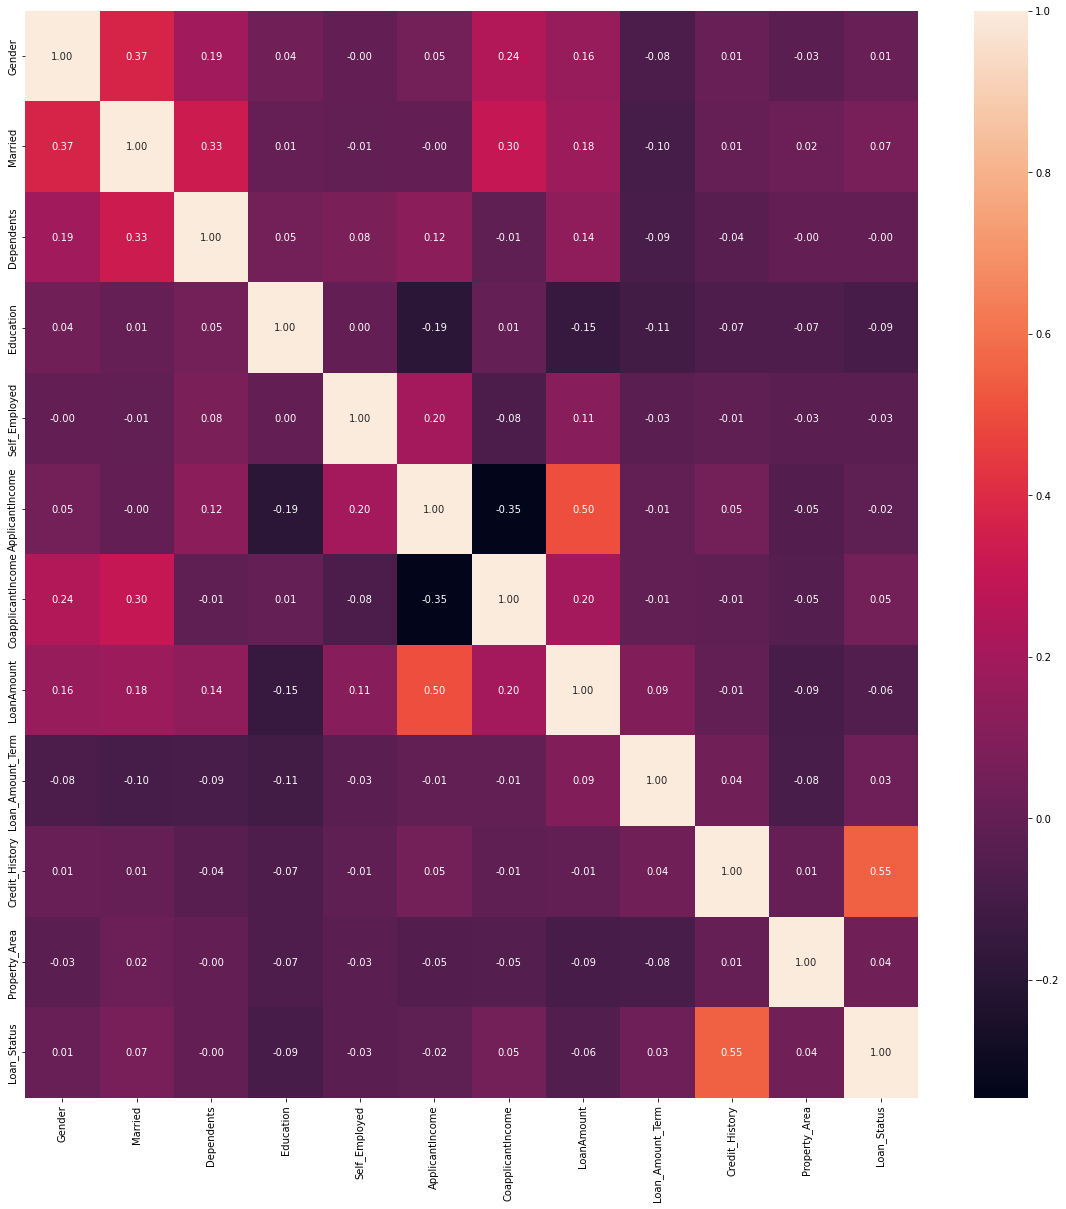

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

As per my obseration correlation values of all features are in range. Let's check for MultiCollinearity problem in the dataset.

In [72]:
from sklearn. preprocessing import StandardScaler
scaler=StandardScaler()
x=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']
x_scaled=scaler.fit_transform(x)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif

,Features,vif value
0,Gender,6.821656
1,Married,4.011460
2,Dependents,1.817229
3,Education,1.292526
4,Self_Employed,1.178617
5,ApplicantIncome,649.851096
6,CoapplicantIncome,3.254816
7,LoanAmount,686.782369
8,Loan_Amount_Term,13.618097
9,Credit_History,7.082280


As per my observation from heatmap and VIF value, the correlation value for 'ApplicantIncome' and 'LoanAmount' are high. Let's drop 'ApplicantIncome' feature, because 'LoanAmount' feature  correlation value with target is more than 'ApplicantIncome' correlation value with target. 

In [74]:
x.drop('ApplicantIncome',axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [75]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif

,Features,vif value
0,Gender,6.792660
1,Married,4.009807
2,Dependents,1.814422
3,Education,1.292019
4,Self_Employed,1.176165
5,CoapplicantIncome,2.511457
6,LoanAmount,29.834065
7,Loan_Amount_Term,13.614193
8,Credit_History,6.965547
9,Property_Area,2.700171


In [76]:
y.value_counts()

1    405
0    177
Name: Loan_Status, dtype: int64

From the above we can observe class imbalance problem exists in the dataset. Let's balance the data.

In [79]:
from imblearn.over_sampling import SMOTE


In [81]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

1    405
0    405
Name: Loan_Status, dtype: int64

In [84]:
x_scaled=scaler.fit_transform(x)

Let's findout the best RandomState value.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
max_acc=0
max_rand_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  46  Accuracy score -  0.8683127572016461


Best Random state is 46.

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=46)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [88]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.7613168724279835


In [89]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.7695473251028807


In [90]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.757201646090535


In [91]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.7489711934156379


In [92]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.7736625514403292


In [93]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.831275720164609


In [94]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.8600823045267489


In [95]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.8436213991769548


From the above we can observe RandomForestClassifier exhibits highest accuracy score of 86%. Let's check accuracy score provided by the model is due to overfitting of the model.

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [97]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.04156378600823041


In [98]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print("Difference is ",acc_score_LR-mean)

Difference is  0.2613168724279835


In [99]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.034979423868312653


In [100]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.04609053497942395


In [101]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.036213991769547316


In [102]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.019341563786008265


In [103]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.020576131687242927


In [104]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.06460905349794244


From the above we can observe GradientBoostingClassifier has least cross validation score. Let's consider this as best model for the dataset.

Let's generate classification report and confusion matrix

In [105]:
from sklearn.metrics import confusion_matrix,classification_report

In [106]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict_DTC))

confusion_matrix
 [[96 26]
 [30 91]]


In [107]:
print("classification report \n",classification_report(y_test,y_predict_DTC))

classification report 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       122
           1       0.78      0.75      0.76       121

    accuracy                           0.77       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.77      0.77      0.77       243



Let's tune parameters and try to increase performance of the model.

In [108]:
from sklearn.model_selection import GridSearchCV

In [111]:
param={
      'max_features':['auto', 'sqrt', 'log2'],
      'min_samples_leaf':[2,3,4],
      'min_samples_split':[5,6,7,8],
      'max_depth':[3,4]}


In [112]:
GSV=GridSearchCV(GDT,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 6, 7, 8]})

In [113]:
GSV.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [118]:
Best_model=GradientBoostingClassifier(max_depth=5,max_features='sqrt',min_samples_leaf=2,min_samples_split=4)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
print("Accuracy score - ",acc)

Accuracy score -  0.8148148148148148


After tuning parameters accuracy score increased to 81%. Let's generate confusion matrix and classification report, 

In [119]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict))

confusion_matrix
 [[ 94  28]
 [ 17 104]]


In [120]:
print("classification report \n",classification_report(y_test,y_predict))

classification report 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       122
           1       0.79      0.86      0.82       121

    accuracy                           0.81       243
   macro avg       0.82      0.81      0.81       243
weighted avg       0.82      0.81      0.81       243



Let's save the model.

In [121]:
import pickle
pickle.dump('Best_model',open('Loan_prediction','wb'))